In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [155]:
df=pd.read_csv(r'https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/salaries.csv')

In [156]:
#df.head()
from sklearn.model_selection import train_test_split


In [157]:
input=df[['company','job','degree']]
output=df[['salary_more_then_100k']]
input

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [158]:
from sklearn.preprocessing import LabelEncoder


In [159]:
le_company=LabelEncoder()

In [160]:
input['company_1']=le_company.fit_transform(input['company'])
input['job_1']=le_company.fit_transform(input['job'])
input['degree1']=le_company.fit_transform(input['degree'])

In [161]:
input

,company,job,degree,company_1,job_1,degree1
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [162]:
input=input.drop(['company','job','degree'],axis=1)
#input
x_train, x_test, y_train, y_test=train_test_split(input,output,test_size=0.1,random_state=5)

In [163]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [164]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [165]:
model.score(x_test,y_test)

0.5

In [166]:
model.predict(x_test)

array([0, 0], dtype=int64)

In [167]:
y_test

,salary_more_then_100k
5,1
1,0


In [168]:
x_test

,company_1,job_1,degree1
5,2,1,1
1,2,2,1


In [169]:
df=pd.DataFrame(input)
df['salary_more_then_100k']=output

In [170]:
df

,company_1,job_1,degree1,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


# decision tree on  titanic dataset

In [171]:
df=pd.read_csv(r'https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv')

In [172]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [186]:
input=df[['Pclass','Sex','Age','Fare']]

In [180]:
dff=pd.crosstab(df.Sex,df.Survived)

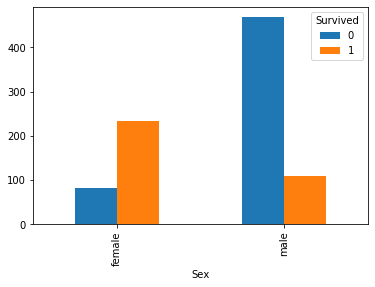

In [185]:
dff.plot(kind='bar')

In [187]:
input

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [190]:
output=df[['Survived']]

In [191]:
output

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [193]:
from sklearn.preprocessing import LabelEncoder

In [198]:
le=LabelEncoder()

In [200]:
input['Sex']=le.fit_transform(df.Sex)
input

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
888,3,0,NaN,23.4500
889,1,1,26.0,30.0000


In [203]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()

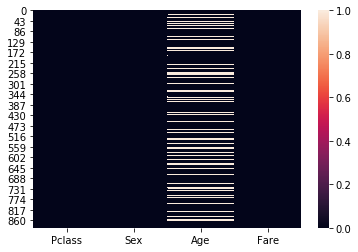

In [204]:
import seaborn as sns
sns.heatmap(input.isnull())

In [205]:
input['Age']=input['Age'].fillna(input['Age'].mean())

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


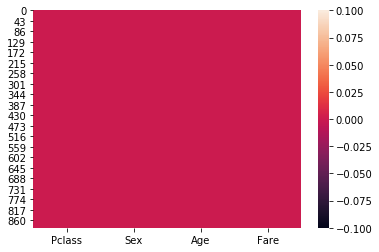

In [207]:
sns.heatmap(input.isnull())

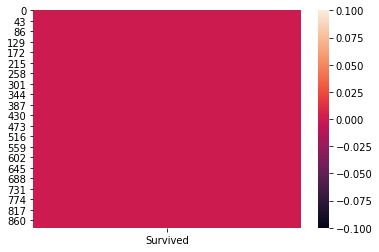

In [208]:
sns.heatmap(output.isnull())

In [209]:
dt.fit(input,output)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [210]:
dt.predict([[3,1,22.0,7.2500]])

array([0], dtype=int64)

In [211]:
output.iloc[0]

Survived    0
Name: 0, dtype: int64

In [212]:
dt.score(input,output)

0.9797979797979798

# train test split

In [247]:
df=pd.read_csv(r'https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv')
from sklearn.model_selection import train_test_split

In [248]:
input=df[['Pclass','Sex','Age','Fare']]
output=df['Survived']
input

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [249]:
input['Age']=input['Age'].fillna(input['Age'].mean())

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [250]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [251]:
input['Sex']=le.fit_transform(input['Sex'])

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [252]:
x_train, x_test, y_train, y_test=train_test_split(input,output,test_size=0.1,random_state=10)

In [253]:
from sklearn import tree
df=tree.DecisionTreeClassifier()


In [254]:
df.fit(x_test,y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [255]:
df.predict(x_test)

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1], dtype=int64)

In [256]:
df.score(x_test,y_test)

1.0

In [296]:
dff=pd.DataFrame(y_test)

In [297]:
dff['predicted']=df.predict(x_test)
dff

,Survived,predicted
590,0,0
131,0,0
628,0,0
195,1,1
230,1,1
...,...,...
722,0,0
581,1,1
177,0,0
418,0,0


In [299]:
dff.loc[590]

Survived     0
predicted    0
Name: 590, dtype: int64

In [300]:
count=0
for i in range(0,90):
    if(dff.iloc[i]['Survived']==dff.iloc[i]['predicted']):
        count=count+1
        
count

90